# Обработка данных для машинного обучения

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### 1. На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

In [116]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### 2. В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

##### a. количество наблюдений:

In [117]:
df.shape[0]

1205

##### b. признаков,

In [118]:
df.shape[1]

14

##### c. предметная область,

Образование, данные описывают уровень адаптивности учащихся в школе, колледже и университете.

##### d. содержание признаков,

Gender - пол студента<br>
Age - диапазон возраста студента<br>
Education Level - уровень учебного заведения<br>
Institution Type - тип учебного заведения<br>
IT Student - учится ли студент на ИТ направлении<br>
Location - находится ли учебное заведение в городе<br>
Load-shedding - уровень снижения учебной нагрузки<br>
Financial Condition - Финансовое положение семьи<br>
Internet Type - тип Интернета, используемый на устройстве в основном<br>
Network Type - Тип сетевого подключения<br>
Class Duration - Продолжительность ежедневных занятий<br>
Self Lms - наличие системы управления обучением<br>
Device - устройство, используемое в классе в основном

##### e. характер целевой переменной,

Adaptivity Level - уровень адаптивности студента

##### f. задача обучения (регрессия, классификация, количество классов)

Задача регрессии

### 3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

##### a. исследование шкалы измерения каждого существенного признака;

In [119]:
# Создаем функцию для рассчета характеристик параметров и применяем ее к датасету

def scale_values(value):
    uniq_values = sorted(value.unique())
    shape_value = len(uniq_values)
    if value.dtype == object:
        min_value = "-"
        max_value = "-"
    else:
        min_value = pd.Series(uniq_values).min()
        max_value = pd.Series(uniq_values).max()

    return value.dtype, shape_value, min_value, max_value, uniq_values

scale_values_res = df.apply(scale_values).transpose()
scale_values_res.columns = ["type", "shape", "min", "max", "uniq_values"]
scale_values_res

,type,shape,min,max,uniq_values
Gender,object,2,-,-,"[Boy, Girl]"
Age,object,6,-,-,"[1-5, 11-15, 16-20, 21-25, 26-30, 6-10]"
Education Level,object,3,-,-,"[College, School, University]"
Institution Type,object,2,-,-,"[Government, Non Government]"
IT Student,object,2,-,-,"[No, Yes]"
Location,object,2,-,-,"[No, Yes]"
Load-shedding,object,2,-,-,"[High, Low]"
Financial Condition,object,3,-,-,"[Mid, Poor, Rich]"
Internet Type,object,2,-,-,"[Mobile Data, Wifi]"
Network Type,object,3,-,-,"[2G, 3G, 4G]"


все параметры имеют нечисловой тип и нуждаются в обработке

##### b. построение эмпирического распределения каждого существенного признака;

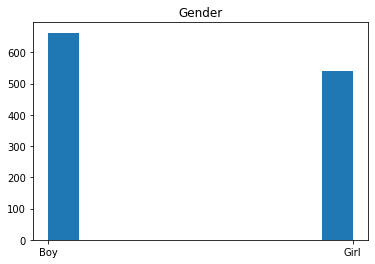

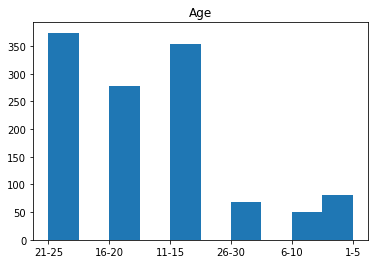

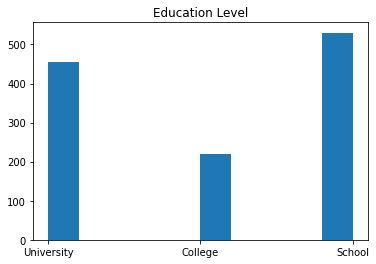

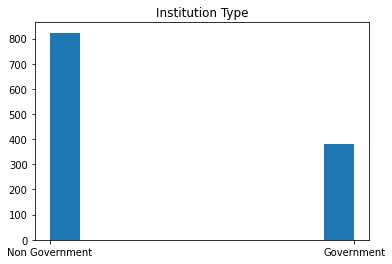

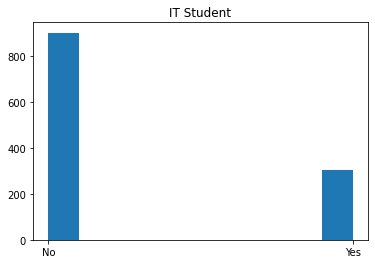

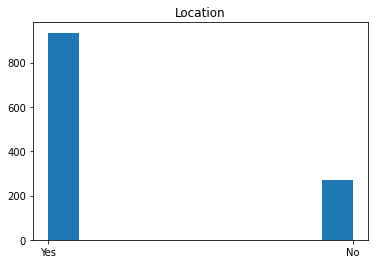

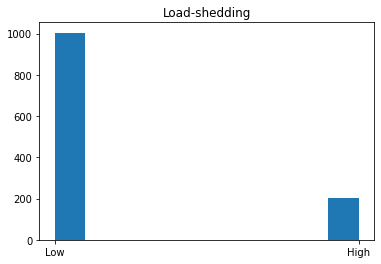

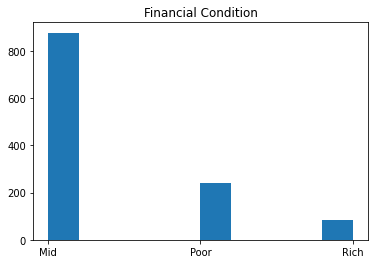

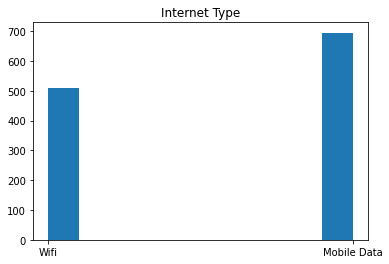

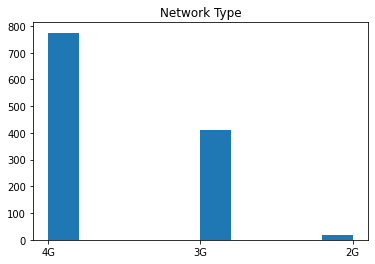

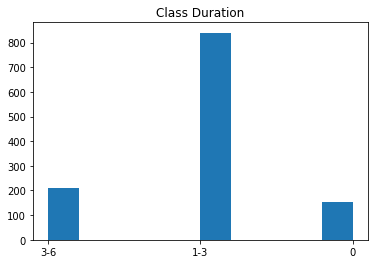

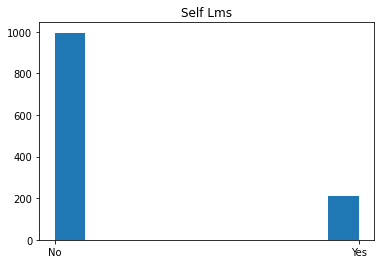

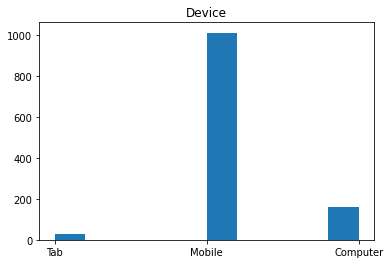

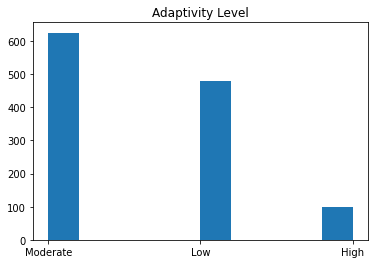

In [120]:
# Строим графики для каждого параметра

for column in df.columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

##### c. анализ количества и распределения отсутствующих значений;

In [121]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

отсутствующие значения не найдены

##### d. построение совместного распределения каждого признака и целевой переменной;

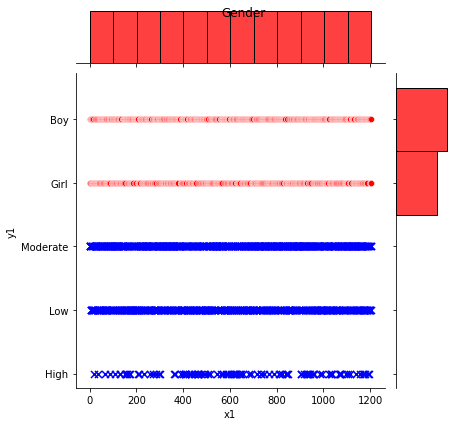

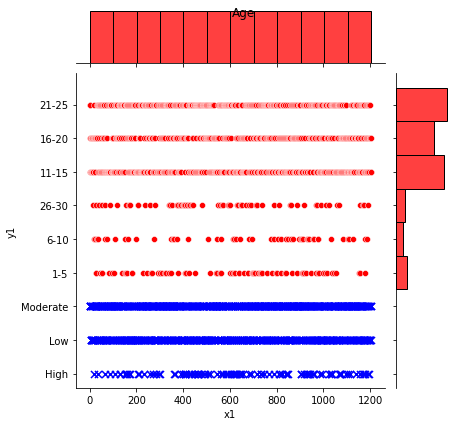

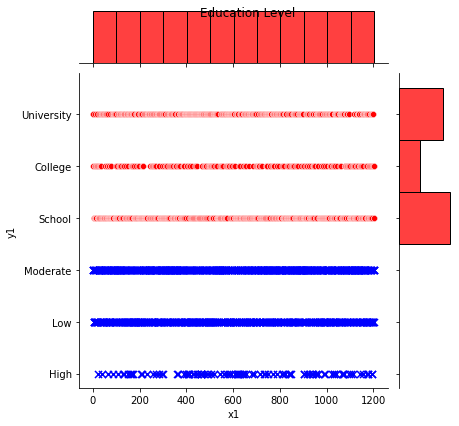

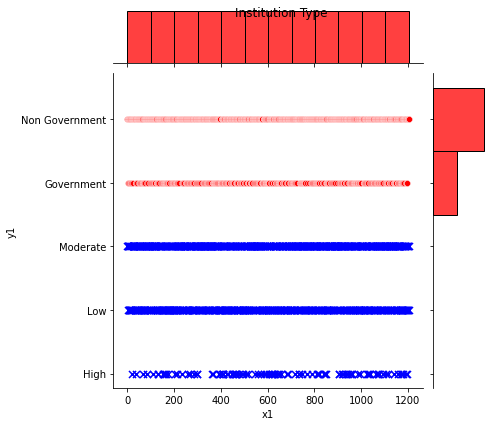

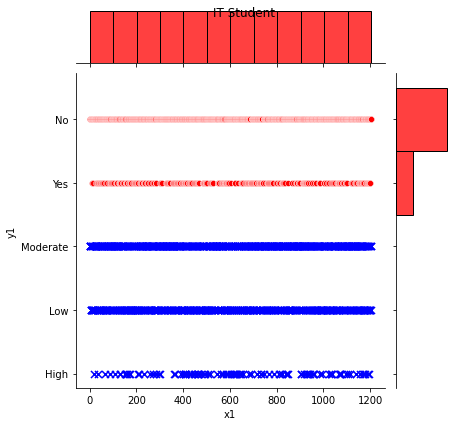

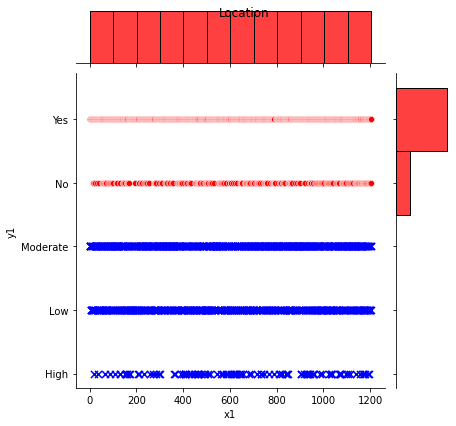

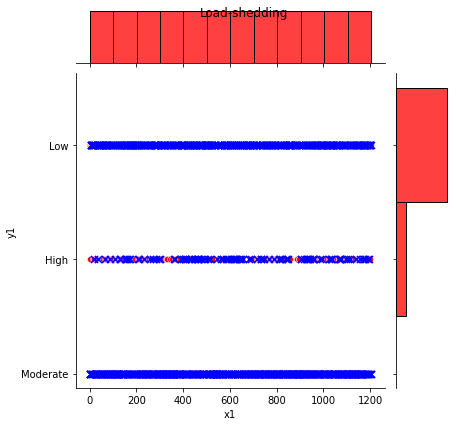

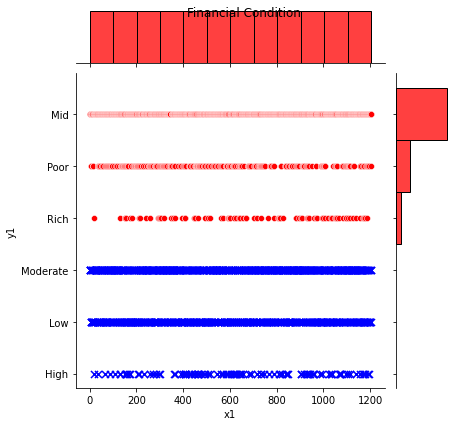

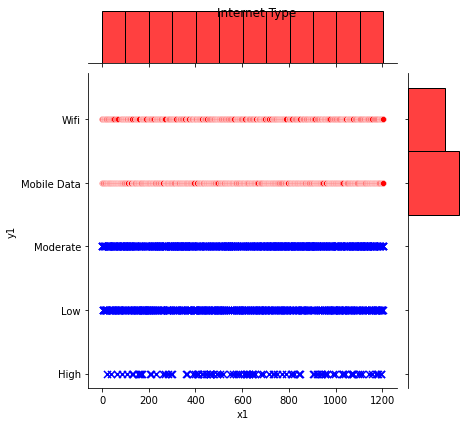

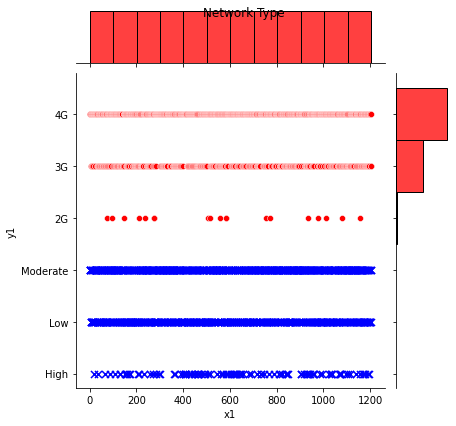

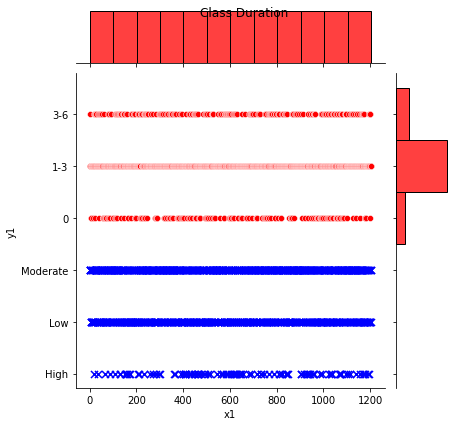

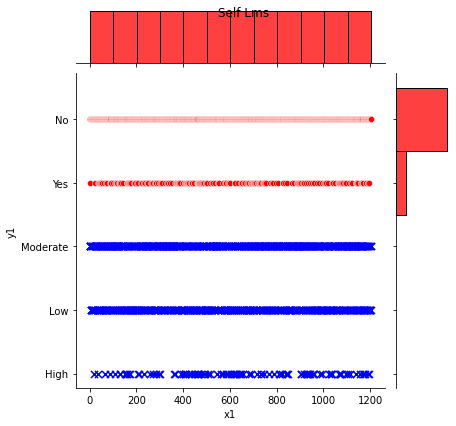

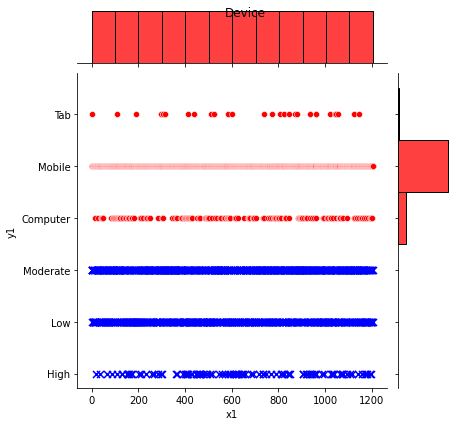

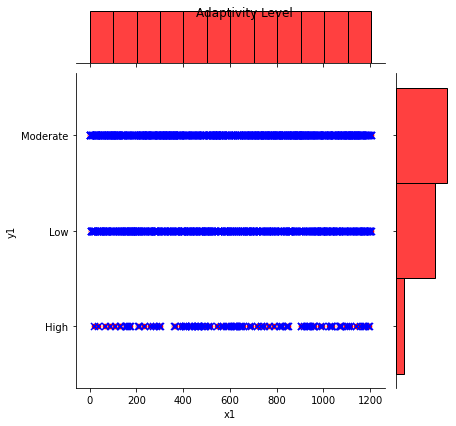

In [122]:
d_alc = pd.DataFrame(df['Adaptivity Level'].reset_index().to_numpy(), columns=['x2', 'y2'])

for i, col in enumerate(df.columns):
    feature = pd.DataFrame(df[col].reset_index().to_numpy(), columns=['x1', 'y1'])
    graph = sns.jointplot(x=feature.x1, y=feature.y1, color='r')
    graph.x = d_alc.x2
    graph.y = d_alc.y2
    graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
    graph.fig.suptitle(col)

##### e. построение корреляционной матрицы.

C:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


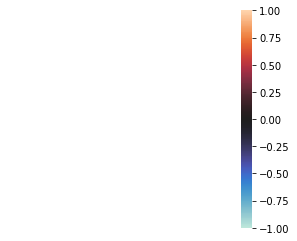

In [123]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    square=True
)

матрица пуста, т.к. все признаки находятся в нечисловом формате. Нужно выполнить обработку данных и повторить построение

### 5. Провести подготовительную обработку данных, включающую следующие шаги:

##### a. удаление или заполнение отсутствующих значений;

в исходных данных не было отсутствующих значений

##### b. приведение всех признаков к бинарной либо числовой шкале;

In [124]:
# проходим по списку категориальных признаков, которые представляют собой бинарные данные, и изменяем их значения на 0 или 1

for column in ['Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Self Lms']:
    # создаем буферный DataFrame новых признаков
    buff = pd.get_dummies(df[column])
    # удаляем один из признаков
    scnd_feature = buff.columns[0]
    buff = buff.drop([scnd_feature], axis=1)
    # переименовываем оставшийся признак с с добавлением комментария, что означают 0 и 1
    buff = buff.rename(columns={buff.columns[0]: '{} ({}=0, {}=1)'.format(column, scnd_feature, buff.columns[0])})

    # заменяем старый признак новой колонкой
    df = df.drop([column], axis=1)
    df = pd.concat([df, buff], axis=1)
df

,Age,Education Level,Financial Condition,Internet Type,Network Type,Class Duration,Device,Adaptivity Level,"Gender (Boy=0, Girl=1)","Institution Type (Government=0, Non Government=1)","IT Student (No=0, Yes=1)","Location (No=0, Yes=1)","Load-shedding (High=0, Low=1)","Self Lms (No=0, Yes=1)"
0,21-25,University,Mid,Wifi,4G,3-6,Tab,Moderate,0,1,0,1,1,0
1,21-25,University,Mid,Mobile Data,4G,1-3,Mobile,Moderate,1,1,0,1,0,1
2,16-20,College,Mid,Wifi,4G,1-3,Mobile,Moderate,1,0,0,1,1,0
3,11-15,School,Mid,Mobile Data,4G,1-3,Mobile,Moderate,1,1,0,1,1,0
4,16-20,School,Poor,Mobile Data,3G,0,Mobile,Low,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,16-20,College,Mid,Wifi,4G,1-3,Mobile,Low,1,1,0,1,1,0
1201,16-20,College,Mid,Wifi,4G,3-6,Mobile,Moderate,1,1,0,0,0,0
1202,11-15,School,Mid,Mobile Data,3G,1-3,Mobile,Moderate,0,1,0,1,1,0
1203,16-20,College,Mid,Wifi,4G,1-3,Mobile,Low,1,1,0,0,1,0


In [125]:
# проходим по списку оставшихся категориальных признаков и создаем для каждого новую колонку с бинарным содержимым

for column in ['Age', 'Education Level', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Device', 'Adaptivity Level']:
    # создаем буферный DataFrame новых признаков
    buff = pd.get_dummies(df[column])
    # переименовываем признаки с добавлением комментария
    buff = buff.rename(columns={x:column + ': ' + x for x in buff.columns})
    # заменяем старый признак новыми
    df = df.drop([column], axis=1)
    df = pd.concat([df, buff], axis=1)
df

,"Gender (Boy=0, Girl=1)","Institution Type (Government=0, Non Government=1)","IT Student (No=0, Yes=1)","Location (No=0, Yes=1)","Load-shedding (High=0, Low=1)","Self Lms (No=0, Yes=1)",Age: 1-5,Age: 11-15,Age: 16-20,Age: 21-25,...,Network Type: 4G,Class Duration: 0,Class Duration: 1-3,Class Duration: 3-6,Device: Computer,Device: Mobile,Device: Tab,Adaptivity Level: High,Adaptivity Level: Low,Adaptivity Level: Moderate
0,0,1,0,1,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
2,1,0,0,1,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
3,1,1,0,1,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
4,1,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,0,1,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1201,1,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1202,0,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1203,1,1,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0


##### c. удаление несущественных либо избыточных признаков;

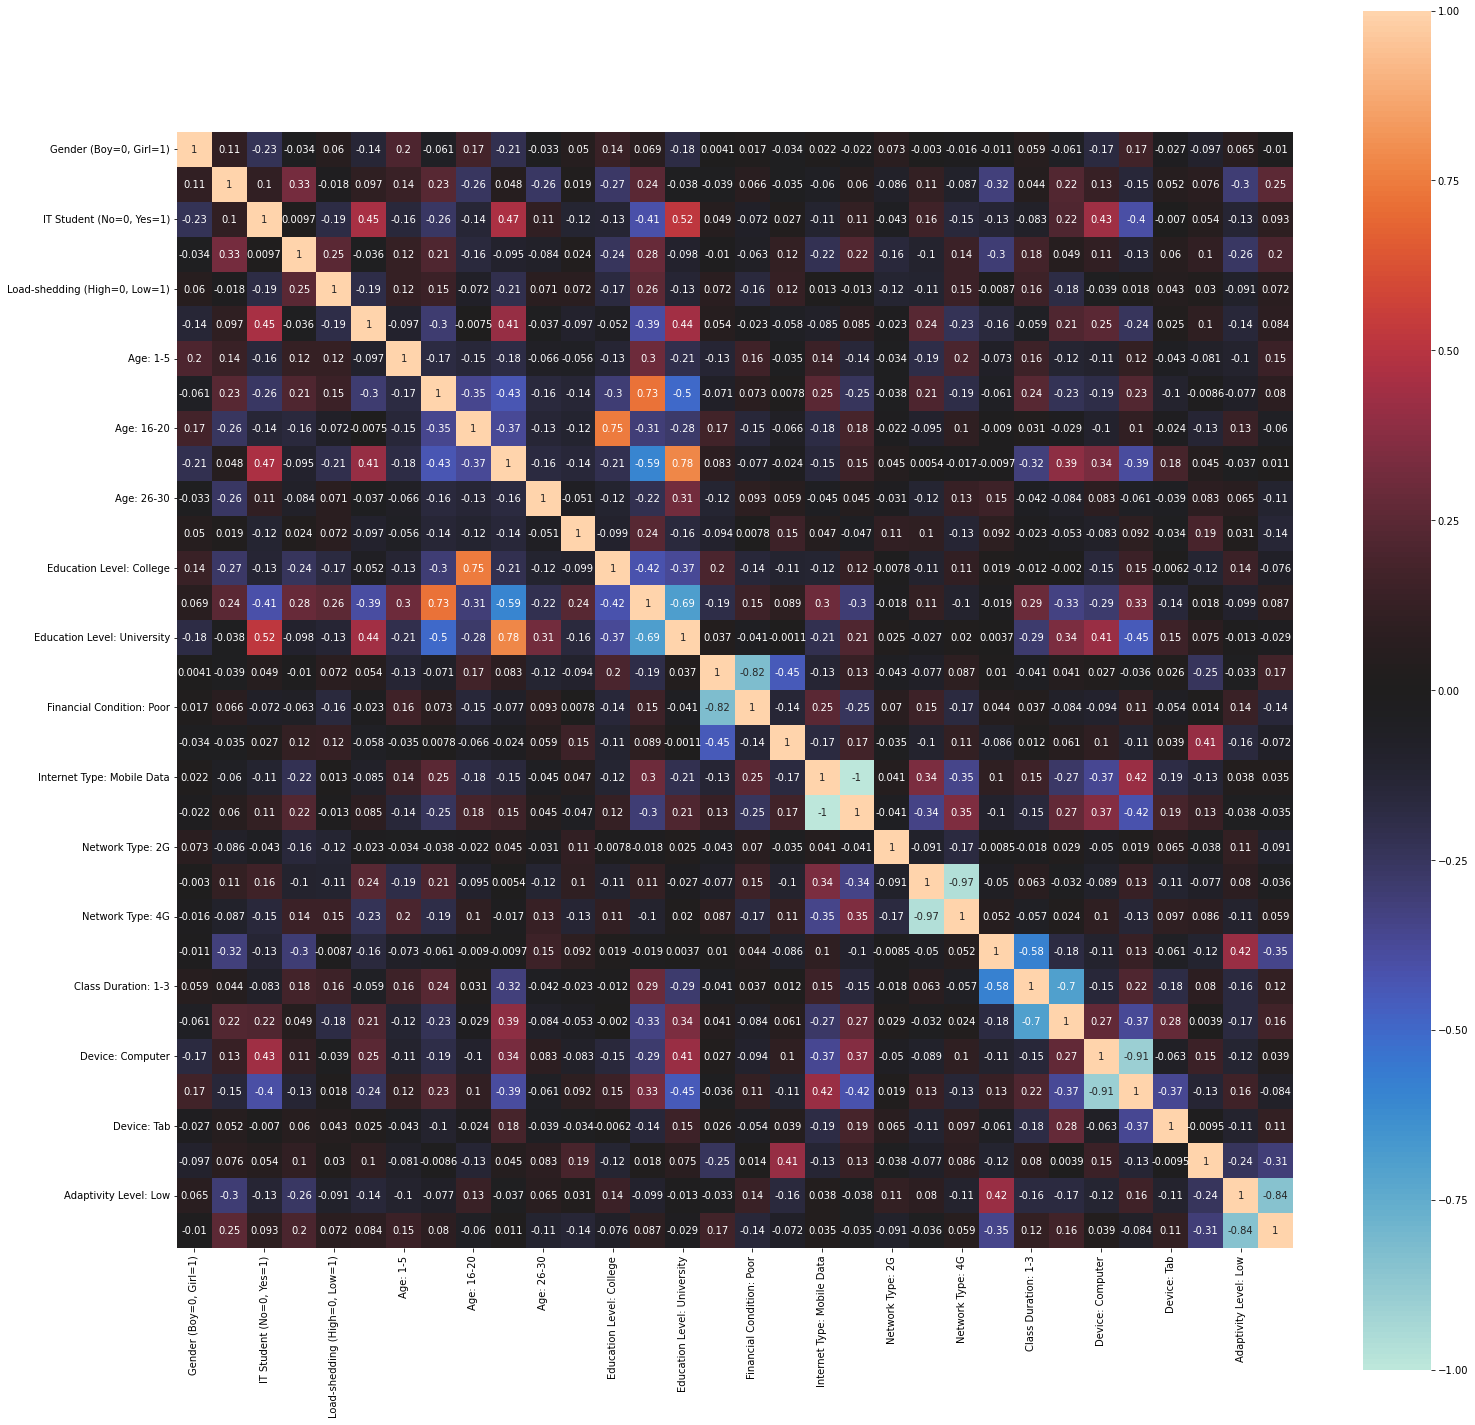

In [126]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(25, 25)

In [127]:
df.columns

Index(['Gender (Boy=0, Girl=1)',
       'Institution Type (Government=0, Non Government=1)',
       'IT Student (No=0, Yes=1)', 'Location (No=0, Yes=1)',
       'Load-shedding (High=0, Low=1)', 'Self Lms (No=0, Yes=1)', 'Age: 1-5',
       'Age: 11-15', 'Age: 16-20', 'Age: 21-25', 'Age: 26-30', 'Age: 6-10',
       'Education Level: College', 'Education Level: School',
       'Education Level: University', 'Financial Condition: Mid',
       'Financial Condition: Poor', 'Financial Condition: Rich',
       'Internet Type: Mobile Data', 'Internet Type: Wifi', 'Network Type: 2G',
       'Network Type: 3G', 'Network Type: 4G', 'Class Duration: 0',
       'Class Duration: 1-3', 'Class Duration: 3-6', 'Device: Computer',
       'Device: Mobile', 'Device: Tab', 'Adaptivity Level: High',
       'Adaptivity Level: Low', 'Adaptivity Level: Moderate'],
      dtype='object')

так как признаки были поделены на несколько бинарных признаков, около главной диагонали можно заметить сильные зависимости в пределах квадратов. Признаками, наиболее сильно влияющими на целефую переменную, являются Financial Condition и Class Duration

### 6. Количественные характеристики датасета необходимо также привести после его обработки.

##### a. количество наблюдений:

In [128]:
df.shape[0]

1205

##### b. признаков,

In [129]:
df.shape[1]

32